In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
train_df = pd.read_csv("train.csv")
train_df = train_df.select_dtypes(include = ["float64","int64"])
train_df= train_df.dropna()
train_df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [4]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Age          714 non-null    float64
 4   SibSp        714 non-null    int64  
 5   Parch        714 non-null    int64  
 6   Fare         714 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 44.6 KB


In [6]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,714.0,448.582633,259.119524,1.00,222.250,445.0000,677.750,891.0000
Survived,714.0,0.406162,0.491460,0.00,0.000,0.0000,1.000,1.0000
Pclass,714.0,2.236695,0.838250,1.00,1.000,2.0000,3.000,3.0000
Age,714.0,29.699118,14.526497,0.42,20.125,28.0000,38.000,80.0000
SibSp,714.0,0.512605,0.929783,0.00,0.000,0.0000,1.000,5.0000
Parch,714.0,0.431373,0.853289,0.00,0.000,0.0000,1.000,6.0000
Fare,714.0,34.694514,52.918930,0.00,8.050,15.7417,33.375,512.3292


In [7]:
train_df["Survived"].value_counts()

0    424
1    290
Name: Survived, dtype: int64

In [8]:
train_df["Pclass"].value_counts() #bilet sınıfı

3    355
1    186
2    173
Name: Pclass, dtype: int64

In [9]:
train_df["Age"].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

In [10]:
train_df["SibSp"].value_counts()

0    471
1    183
2     25
4     18
3     12
5      5
Name: SibSp, dtype: int64

In [11]:
train_df["Parch"].value_counts()

0    521
1    110
2     68
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [12]:
train_df["Fare"].value_counts()

13.0000    41
26.0000    30
8.0500     29
10.5000    24
7.8958     23
           ..
7.1417      1
32.3208     1
13.8583     1
15.5500     1
8.3625      1
Name: Fare, Length: 220, dtype: int64

# Outlier Treatment

In [13]:
df_fare = train_df["Fare"]

In [14]:
df_fare.head()

0     7.2500
1    71.2833
2     7.9250
3    53.1000
4     8.0500
Name: Fare, dtype: float64

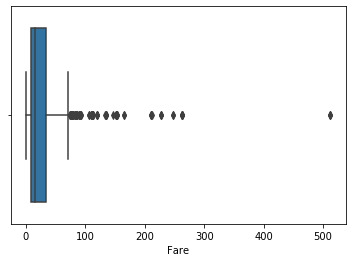

In [15]:
sns.boxplot(x = df_fare);

In [16]:
Q1 = df_fare.quantile(0.25)
Q3 = df_fare.quantile(0.75)
IQR = Q3-Q1

In [17]:
Q1

8.05

In [18]:
Q3

33.375

In [19]:
IQR

25.325

In [20]:
lower_limit =  Q1 - 1.5*IQR
upper_limit =  Q3 + 1.5*IQR

In [21]:
lower_limit

-29.937499999999996

In [22]:
upper_limit

71.3625

In [23]:
(df_fare < lower_limit) | (df_fare > upper_limit)

0      False
1      False
2      False
3      False
4      False
       ...  
885    False
886    False
887    False
889    False
890    False
Name: Fare, Length: 714, dtype: bool

In [24]:
outlier_tf = (df_fare > upper_limit)

In [25]:
outlier_tf.head()

0    False
1    False
2    False
3    False
4    False
Name: Fare, dtype: bool

In [26]:
df_fare[outlier_tf]

27     263.0000
34      82.1708
52      76.7292
61      80.0000
62      83.4750
         ...   
820     93.5000
829     80.0000
835     83.1583
856    164.8667
879     83.1583
Name: Fare, Length: 94, dtype: float64

In [27]:
df_fare[outlier_tf].index

Int64Index([ 27,  34,  52,  61,  62,  72,  88, 102, 118, 120, 124, 139, 195,
            215, 218, 224, 230, 245, 257, 258, 262, 268, 269, 275, 290, 291,
            297, 299, 305, 307, 310, 311, 318, 319, 325, 332, 337, 341, 366,
            373, 377, 380, 385, 390, 393, 412, 435, 438, 445, 453, 484, 486,
            496, 498, 504, 505, 520, 537, 544, 550, 558, 581, 585, 587, 591,
            609, 627, 645, 655, 659, 660, 665, 679, 681, 689, 698, 700, 708,
            716, 730, 737, 741, 742, 759, 763, 765, 779, 789, 802, 820, 829,
            835, 856, 879],
           dtype='int64')

In [28]:
#type(df_fare)

In [29]:
#df_fare = pd.DataFrame(df_fare)

In [30]:
#df_fare.shape

In [31]:
#clear_tf = df_fare[~((df_fare < (lower_limit)) | (df_fare > (upper_limit))).any(axis= 1)]

In [32]:
#clear_tf.shape #116 tane gözlem uçmuş oldu iki yanlı bir şekilde gözlemimizi değerlendirdiğimizde

# Bakılama

In [33]:
df_fare = train_df["Fare"]

In [34]:
lower_limit

-29.937499999999996

In [35]:
df_fare[outlier_tf]

27     263.0000
34      82.1708
52      76.7292
61      80.0000
62      83.4750
         ...   
820     93.5000
829     80.0000
835     83.1583
856    164.8667
879     83.1583
Name: Fare, Length: 94, dtype: float64

In [36]:
upper_limit

71.3625

In [37]:
df_fare[outlier_tf] = upper_limit

In [38]:
df_fare[outlier_tf] #üst sınır değerinin üstünde kalan değerleri üst sınır değerine baskıladım yani eşik değerimizin üzerinde olan değerleri eşik değerimize göre baskılamış olduk.

27     71.3625
34     71.3625
52     71.3625
61     71.3625
62     71.3625
        ...   
820    71.3625
829    71.3625
835    71.3625
856    71.3625
879    71.3625
Name: Fare, Length: 94, dtype: float64

# Çok Değişkenli Aykırı Gözlem Analizi

# Local Outlier Factor(LOF)

Gözlemleri bulundukları konumda yoğunluk tabanlı skorlayarak buna göre aykırı değer olabilecek değerleri tanımlayabilmemize imkan sağlıyor.
Bu noktaların local yoğunluğu bu noktaların komşuları ile karşılaştırılıyor. Eğer komşularının yoğunluğundan anlamlı bir şekilde düşük ise bu nokta komşulardan daha seyrek bir bölgede bulunuyordur yorumu yapılabilir. Dolayısıyla burada bir komşuluk yapısı söz konusu olup bir değerin çevresi eğer yoğun değilse demek ki bu değer aykırı değerdir şekinde değerlendiriliyor. Kısaca her bir gözlem değeri için skor veriyor diyebiliriz.

In [39]:
train_df = pd.read_csv("train.csv")
train_df = train_df.select_dtypes(include = ["float64","int64"])
df = train_df.copy()
df = df.dropna()
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [40]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor

In [41]:
#?LocalOutlierFactor

In [42]:
clf = LocalOutlierFactor(n_neighbors = 20, contamination = 0.1) #n_neighbors: komşuluk sayısını ifade ediyor.
#contamination: yoğunluğu ifade eden bir argüman

In [43]:
clf.fit_predict(df) #clf nesnesi lOF'un biçimsel özelliklerini barındırıyor.Bunu kullanarak bir fit etme
#algoritma çalıştırma işlemi gerçekleştiriyoruz.

array([ 1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1

In [44]:
df_scores = clf.negative_outlier_factor_

In [45]:
df_scores[0:10] #elimizdeki her bir gözlem biriminin skoru yani yoğunluk skoru ya da LOF skoru

array([-1.04886144, -1.40152622, -1.0272882 , -1.18715638, -1.032355  ,
       -1.21030796, -1.08043279, -1.01112239, -1.01609486, -1.05651303])

In [46]:
np.sort(df_scores)[0:20] #sort fonk. ile df_scores i sıraladık

array([-3.71511514, -3.69624121, -3.40388487, -3.29366015, -3.1694    ,
       -2.85284393, -2.36079376, -2.04154545, -1.98565576, -1.98202238,
       -1.90975713, -1.85406048, -1.82136601, -1.76144582, -1.75521116,
       -1.72826227, -1.72394747, -1.70620532, -1.69245969, -1.69207029])

In [47]:
threshold_value = np.sort(df_scores)[9]

In [48]:
outlier_tf = df_scores > threshold_value #eşik değerden yukarıda olanları outlier_tf olarak kaydettim

In [49]:
outlier_tf

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [50]:
new_df = df[df_scores > threshold_value] #eşik değrin üzerinde olan bu koşulu sağlayan hepsini aldık.
#yani bu aykırı olmayan değerlere erişmek ve aykırı değerleri silmek anlamına geliyor.

In [51]:
new_df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
885,886,0,3,39.0,0,5,29.1250
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
889,890,1,1,26.0,0,0,30.0000


In [52]:
 df[df_scores < threshold_value] # tersine çevirdiğimde aykırı gözlemleri görüyoruz.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
27,28,0,1,19.0,3,2,263.0000
88,89,1,1,23.0,3,2,263.0000
118,119,0,1,24.0,0,1,247.5208
258,259,1,1,35.0,0,0,512.3292
679,680,1,1,36.0,0,1,512.3292
700,701,1,1,18.0,1,0,227.5250
737,738,1,1,35.0,0,0,512.3292
742,743,1,1,21.0,2,2,262.3750
856,857,1,1,45.0,1,1,164.8667


Not: Box plot yöntemini uygularken  fare değişkenine göre aşağı ve yukarı yönlü olarak outlier_tf'i gözlemlediğimizde çok fazla gözlem elimize geçmişti fakat LOF'ta daha az kısıtlı sayıda gözleme ulaştık. Aslında bir silme yöntemi uyguladık desem daha doğru olur.

# baskılama

Belirlemiş olduğumuz eşik değerin indexsinde olan değerlerin değerlerine göre atama işlemi gerçekletirmek LOF'ta en mantıklı yaklaşım olabilir.

In [53]:
df[df_scores == threshold_value] 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
879,880,1,1,56.0,0,1,83.1583


Yukarıdaki belirlemiş olduğumuz eşik değerdi.
Eşik değeri nasıl belirlemiştik LOF skoru dediğimiz yoğunluk tabanlı bir skor oluşturmuştuk.
df_scores diye kaydetmiştik ve oradan 9. indexsi eşik değer olarak belirledim.
bunun numerik bir değer olarak karşılığını şu an yukarıda gözlemliyoruz.

In [54]:
print_worth = df[df_scores == threshold_value] #baskı değeri olarak kaydettim;
#amacımız bu gözlem birimine göre doldurma işlemini gerçekleştirmek.

In [55]:
outliers =df[~outlier_tf] #aykırılarıda kaydediyorum

Amaç aykırıların yerine baskı değerlerini yerleştirmek bunu yapacağım.

Şimdi yukarıda outliers kısmında oluşan index problemini çözmek için işlem yapacağım.
İsimlendirdiğim outliers dataframe'ini indexsiz bir arraye çevirdikten sonra baskı değeri yani print_worth'u
arrayleştirip en son outliers'leri print_worth ile değiştirmiş olacağız.

In [56]:
outliers

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
27,28,0,1,19.0,3,2,263.0000
88,89,1,1,23.0,3,2,263.0000
118,119,0,1,24.0,0,1,247.5208
258,259,1,1,35.0,0,0,512.3292
679,680,1,1,36.0,0,1,512.3292
700,701,1,1,18.0,1,0,227.5250
737,738,1,1,35.0,0,0,512.3292
742,743,1,1,21.0,2,2,262.3750
856,857,1,1,45.0,1,1,164.8667
879,880,1,1,56.0,0,1,83.1583


In [57]:
res = outliers.to_records(index = False)

In [58]:
res[:] = print_worth.to_records(index = False)

In [59]:
res

rec.array([(880, 1, 1, 56., 0, 1, 83.1583),
           (880, 1, 1, 56., 0, 1, 83.1583),
           (880, 1, 1, 56., 0, 1, 83.1583),
           (880, 1, 1, 56., 0, 1, 83.1583),
           (880, 1, 1, 56., 0, 1, 83.1583),
           (880, 1, 1, 56., 0, 1, 83.1583),
           (880, 1, 1, 56., 0, 1, 83.1583),
           (880, 1, 1, 56., 0, 1, 83.1583),
           (880, 1, 1, 56., 0, 1, 83.1583),
           (880, 1, 1, 56., 0, 1, 83.1583)],
          dtype=[('PassengerId', '<i8'), ('Survived', '<i8'), ('Pclass', '<i8'), ('Age', '<f8'), ('SibSp', '<i8'), ('Parch', '<i8'), ('Fare', '<f8')])

In [60]:
df[~outlier_tf]

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
27,28,0,1,19.0,3,2,263.0000
88,89,1,1,23.0,3,2,263.0000
118,119,0,1,24.0,0,1,247.5208
258,259,1,1,35.0,0,0,512.3292
679,680,1,1,36.0,0,1,512.3292
700,701,1,1,18.0,1,0,227.5250
737,738,1,1,35.0,0,0,512.3292
742,743,1,1,21.0,2,2,262.3750
856,857,1,1,45.0,1,1,164.8667
879,880,1,1,56.0,0,1,83.1583


In [61]:
df[~outlier_tf] = pd.DataFrame(res, index = df[~outlier_tf].index)

In [62]:
df[~outlier_tf]

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
27,880,1,1,56.0,0,1,83.1583
88,880,1,1,56.0,0,1,83.1583
118,880,1,1,56.0,0,1,83.1583
258,880,1,1,56.0,0,1,83.1583
679,880,1,1,56.0,0,1,83.1583
700,880,1,1,56.0,0,1,83.1583
737,880,1,1,56.0,0,1,83.1583
742,880,1,1,56.0,0,1,83.1583
856,880,1,1,56.0,0,1,83.1583
879,880,1,1,56.0,0,1,83.1583


# makine öğrenmesi algoritmaları ile eksik gözlemleri doldurma

In [63]:
# KNN

In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno

In [89]:
train_df = pd.read_csv("train.csv")
train_df = train_df.select_dtypes(include = ["float64","int64"])
train_df.head(20)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
5,6,0,3,NaN,0,0,8.4583
6,7,0,1,54.0,0,0,51.8625
7,8,0,3,2.0,3,1,21.0750
8,9,1,3,27.0,0,2,11.1333
9,10,1,2,14.0,1,0,30.0708


In [90]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Fare             0
dtype: int64

In [95]:
!pip install ycimpute

In [96]:
from ycimpute.imputer import knnimput #ycimpute içerisinden bir fonk. aldık

In [70]:
var_names = list(train_df) #değişkenlerin ismini tutmak df in isimlerini bir yerde saklıyorum.

In [71]:
n_df = np.array(train_df) #yeni bi array olusturuyorum

In [72]:
n_df[0:10]

array([[ 1.    ,  0.    ,  3.    , 22.    ,  1.    ,  0.    ,  7.25  ],
       [ 2.    ,  1.    ,  1.    , 38.    ,  1.    ,  0.    , 71.2833],
       [ 3.    ,  1.    ,  3.    , 26.    ,  0.    ,  0.    ,  7.925 ],
       [ 4.    ,  1.    ,  1.    , 35.    ,  1.    ,  0.    , 53.1   ],
       [ 5.    ,  0.    ,  3.    , 35.    ,  0.    ,  0.    ,  8.05  ],
       [ 6.    ,  0.    ,  3.    ,     nan,  0.    ,  0.    ,  8.4583],
       [ 7.    ,  0.    ,  1.    , 54.    ,  0.    ,  0.    , 51.8625],
       [ 8.    ,  0.    ,  3.    ,  2.    ,  3.    ,  1.    , 21.075 ],
       [ 9.    ,  1.    ,  3.    , 27.    ,  0.    ,  2.    , 11.1333],
       [10.    ,  1.    ,  2.    , 14.    ,  1.    ,  0.    , 30.0708]])

In [73]:
n_df.shape #gözlem ve değişken sayısı

(891, 7)

In [74]:
dff = knnimput.KNN(k=4).complete(n_df) #komşuluk sayısı = 4 , complete:doldur demek 
#eksik gördüğü gözlemleri doldurdu

Imputing row 1/891 with 0 missing, elapsed time: 0.263
Imputing row 101/891 with 0 missing, elapsed time: 0.265
Imputing row 201/891 with 0 missing, elapsed time: 0.267
Imputing row 301/891 with 1 missing, elapsed time: 0.269
Imputing row 401/891 with 0 missing, elapsed time: 0.271
Imputing row 501/891 with 0 missing, elapsed time: 0.273
Imputing row 601/891 with 0 missing, elapsed time: 0.275
Imputing row 701/891 with 0 missing, elapsed time: 0.277
Imputing row 801/891 with 0 missing, elapsed time: 0.279


In [75]:
type(dff)

numpy.ndarray

In [76]:
dff = pd.DataFrame(dff, columns = var_names) #pandas df çevirdim

In [77]:
type(dff)

pandas.core.frame.DataFrame

In [78]:
dff.isnull().sum() #sıfırlandı eksik değerler dolduruldu

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [97]:
# EM

In [98]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
train_df = pd.read_csv("train.csv")
train_df = train_df.select_dtypes(include = ["float64","int64"])
train_df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [99]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Fare             0
dtype: int64

In [100]:
var_names = list(train_df)

In [101]:
n_df = np.array(train_df)

In [102]:
from ycimpute.imputer import EM

In [103]:
dff = EM().complete(n_df)

In [104]:
dff = pd.DataFrame(dff, columns = var_names)

In [106]:
dff.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

dipnott: eksik değerleri bu şekilde tahmine dayalı yöntemlerle doldurmuş olsak dahi; öncesinde bir yapısal problem var mı ya da
rasgelelik problemi var mı bazı değişkenlerdeki eksiklikler diğer değişkenlere bağlı mı aradaki bağlantıyı
kurtuktan sonra bu yöntemleri kullanmamız daha sağlıklı sonuçlar verir.